*MEDICAL INSURANCE COST PREDICTION*

create a automatic system that can predict what is the medical insurance cost

Using linear regression model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**Data colection and Analysis**

In [2]:
#loading the data from csv filr to pandas Dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
#print first 5 rows  using head()

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#find the row and colum using shape
insurance_dataset.shape

(1338, 7)

In [5]:
#getting some information using info
insurance_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features: dtype = float

1.   sex  
2.   smoker
3.    region

In [6]:
#checking for missing values
insurance_dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


**Data** **ANALYSIS**

In [7]:
#statistical measure using describe()
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-8de8f3718354>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])  # pour prendre  charges


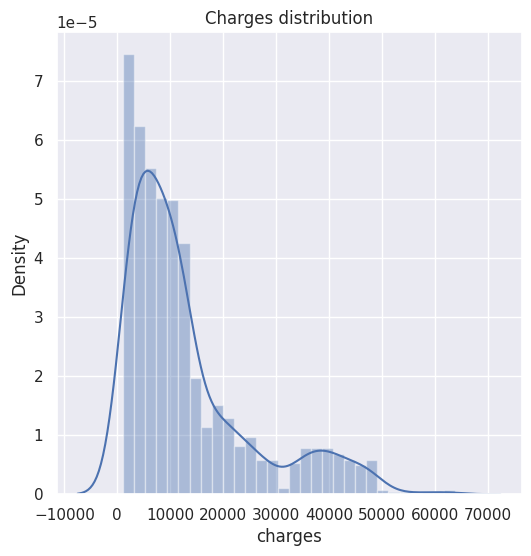

In [8]:
#distribution of charges value 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])  # pour prendre  charges 
plt.title('Charges distribution')
plt.show()

<ipython-input-9-057207c40405>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])  # pour prendre  charges


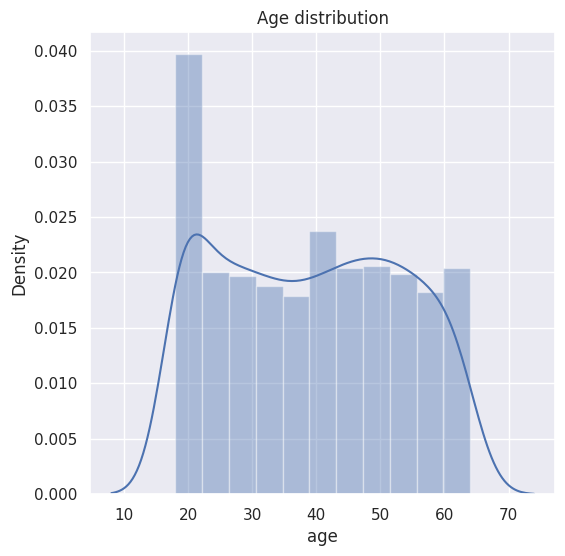

In [9]:
#distribution of age value 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])  # pour prendre  charges 
plt.title('Age distribution')
plt.show()

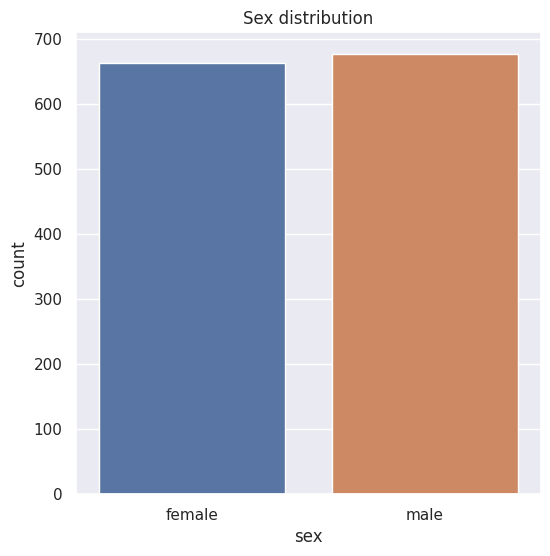

In [10]:
# distribution sex ( categorical feature)
plt.figure(figsize=(6,6))
sns.countplot(x ='sex', data = insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [11]:
# to know the number into the datatest sex 

insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-12-ca7af14b76d5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])  # pour prendre  charges


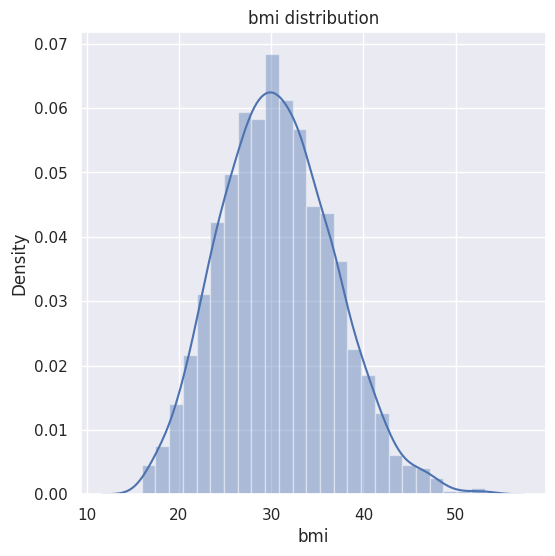

In [12]:
#distribution of bmi value 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])  # pour prendre  charges 
plt.title('bmi distribution')
plt.show()

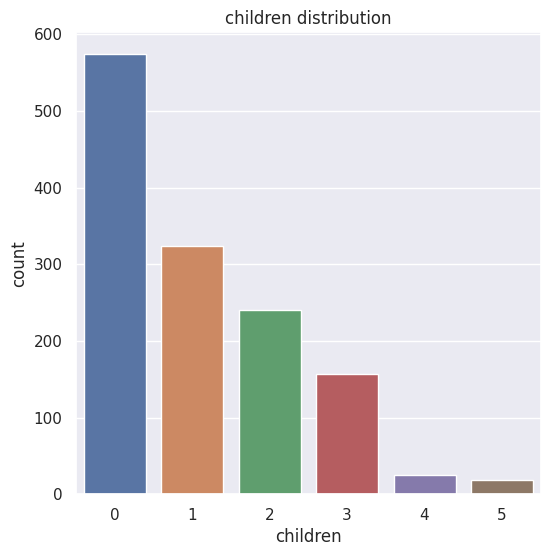

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
# distribution children
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children distribution')
plt.show()

insurance_dataset['children'].value_counts()

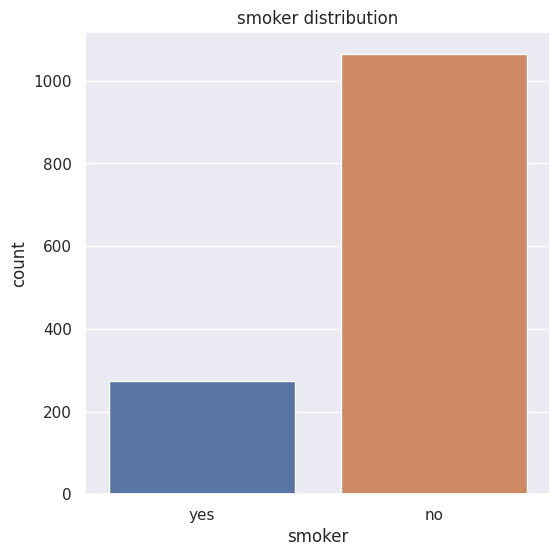

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
# distribution smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker distribution')
plt.show()

insurance_dataset['smoker'].value_counts()

Data Pre_Processing

Encoding categorical Feature

In [15]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#encoding region
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1  , 'northeast':2  , 'northwest':3 }}, inplace=True)

Splitting the features and target

In [16]:
X = insurance_dataset.drop(columns='charges', axis =1)
Y = insurance_dataset['charges']

In [17]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


Splitting the data into training data & testing data

In [18]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [19]:
print(X.shape ,  X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training 

Using linear Regression Model



1.    x axis  **Feature** ( input feature )  --> age - smoker - region - bmi 
2.    y axis  **Target**  ( prediction probability) -->  charges



In [20]:
# loading linear regression model
regressor = LinearRegression()

In [21]:
regressor.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

In [22]:
#prediction on training data 
training_data_prediction = regressor.predict(X_train)

In [23]:
# R square value 
r2_train = metrics.r2_score(Y_train, training_data_prediction )
print('R square value : ', r2_train)

R square value :  0.751505643411174


In [24]:
#prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [25]:
# R square value 
r2_test = metrics.r2_score(Y_test, test_data_prediction )
print('R square value : ', r2_test)

R square value :  0.7447273869684076


Buillding a Predictive System

In [26]:
input_data = (31,1,25.74,0,1,0)

# change input data to numpy array 
input_data_as_numpy = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print('The insurance cost is USD', prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import pickle

In [28]:
filename = 'insurance.sav'

pickle.dump(regressor , open(filename,'wb'))

In [29]:
loaded_model = pickle.load(open('insurance.sav' , 'rb'))

In [30]:
input_data = (31,1,25.74,0,1,0)

# change input data to numpy array 
input_data_as_numpy = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print('The insurance cost is USD', prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
